## HW9 - Assignment 2 - Statsmodel Linear Regression
#### Principles of Urban Informatics, NYU
Zoe Martiniak, November 12 2018

In [104]:
__author__ = 'zem232'

from __future__ import print_function, division
import pylab as pl

import os
import json

import statsmodels.api as sm
import statsmodels.formula.api as smf
s = json.load( open("fbb_matplotlibrc.json") )
pl.rcParams.update(s)

random.seed(199)

%pylab inline


Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/__init__.py:800: MatplotlibDeprecationWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  mplDeprecation)


In [105]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)

### 1. Create a line with chosen slope & intercept=0, then plot it with uncertainties as errorbars

-- Assuming the error is supposed to be added to the line:

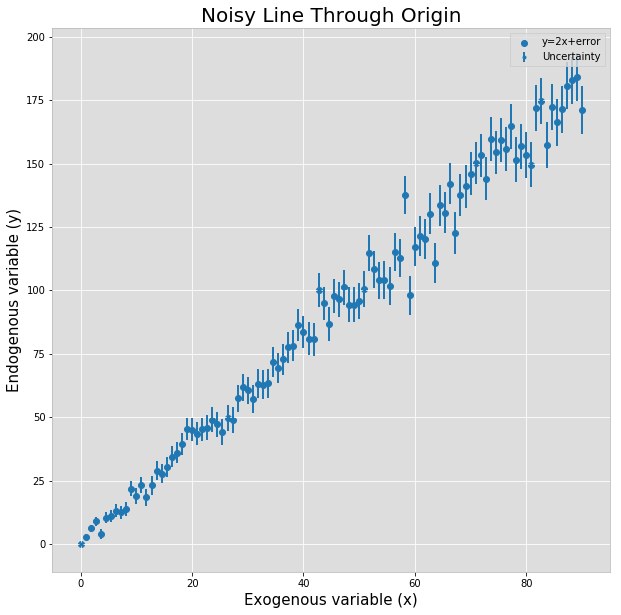

In [331]:
## I assume you want the error to be added to line, correct?
x = np.linspace(0,90,100)
y = line(2, x,0,errors=errors)
error=errors(x)
fig = pl.figure(figsize=(10,10))
# adding the error bars
pl.errorbar(x, y, yerr=error, fmt='.', label = "Uncertainty")
# creating scatterplot of points
pl.scatter(x, y, label = "y=2x+error")
pl.xlabel('Exogenous variable (x)', size=15)
pl.ylabel('Endogenous variable (y)',size=15)
pl.title('Noisy Line Through Origin',size=20)
pl.legend()

**Figure 1** A line with noise was created by formulating a simple line passing through the origin (in this case y=2x) and adding noise pulled from a random standard distribution multiplied by the square root of x. The uncertainty intervals indicated as errorbars are equal to twice the square root of x. 

### 2. Print y,x and the result of applying statsmodels.api.add_constant() to x

In [332]:
print('y: \n', y)
print('\n x: \n',x)
x1=sm.add_constant(x)
print('\n sm.add_constant(x): \n',x1)

y: 
 [   0.            2.97898149    6.29962141    8.97990301    3.86942965
   10.44822659   11.08832277   13.11040708   12.50320823   13.87664374
   21.89597548   18.77571062   23.3408734    18.42826799   23.10311134
   28.97291765   27.76586689   30.22479242   34.49127293   36.04267165
   39.45616116   45.22097359   45.0599193    43.5022844    45.1928054
   45.94096452   49.08352973   47.29434059   44.08623252   49.60684044
   48.96181015   57.52155302   61.7317919    60.56912807   57.05469829
   63.24990562   62.75015324   63.31656888   71.87568666   69.29263839
   72.8134322    77.55562251   78.26353892   86.22466084   83.62455653
   81.01690764   80.68630832  100.16272688   94.91047422   86.64187848
   97.74019144   96.41401117  101.29252035   94.30317141   94.38333537
   95.82793114  100.395588    114.77268538  108.22975041  103.92171796
  104.1812237   101.697713    115.20630422  112.68335265  137.61524193
   98.01535726  117.21340114  121.35016182  120.3016962   130.29540846
  

### 3. Use Statsmodels.api.OLS to fit x and y


In [336]:
smfit_wrong = smf.OLS(y, x).fit()
bold='\033[1m'
unbold='\033[0m'
print('a. Passing x as exogenous variable \n')
print(bold+'Linear Correlation Through Origin'.center(80)+unbold)
print(smfit_wrong.summary(),'\n')
smfit_right = smf.OLS(y, x1).fit()
print('\n b. Passing statsmodels.api.add_constant(x) as exogenous variable \n')
print(bold+'Linear Correlation with Intercept'.center(80)+unbold)
print(smfit_right.summary())

a. Passing x as exogenous variable 

                       Linear Correlation Through Origin                        
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 2.888e+04
Date:                Tue, 13 Nov 2018   Prob (F-statistic):          6.48e-124
Time:                        20:23:48   Log-Likelihood:                -323.47
No. Observations:                 100   AIC:                             648.9
Df Residuals:                      99   BIC:                             651.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------

**Discussion:** By default, statsmodels OLS linear regression does not include an intercept and fits a line through the origin, so the user must manually add a constant column to their data if an intercept coefficient is required. In this case, the R-squared for the linear correlation through the origin is 0.997, and the R-squared for the linear correlation with an intercept is 0.987. The coefficient of x for the origin regression is 2.0152 with a standard error of 0.012, while the coefficient of x for the intercept regression is 2.0115 with standard error of 0.024. Furthermore, the coefficient for the constant is 0.223 with std. error of 1.232 (greater than the value of the coefficient), and the 95% confidence interval is -2.222 to 2.668, which includes the origin. Therefore the regression that was fit through the origin seems to be the better fit, while the regression with an intercept is more flexible. 

### 4. Create scatterplot of data with both statsmodel regression lines produced in part 3.

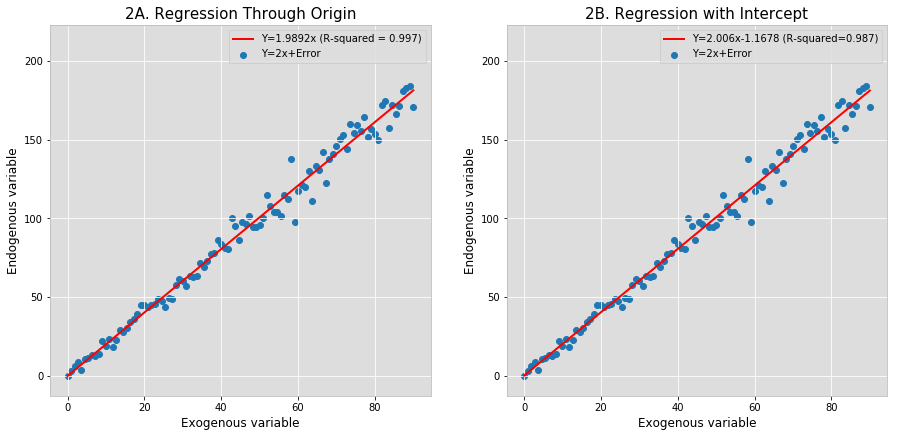

In [338]:
fig = pl.figure(figsize=(15,15))
ax = fig.add_subplot(221, sharey=ax2)
ax.scatter(x, y,label = "Y=2x+Error")
ax.plot(x,smfit_wrong.predict(x),'r', label='Y=1.9892x (R-squared = 0.997)')
ax.set_xlabel('Exogenous variable')
ax.set_ylabel('Endogenous variable')
ax.set_title('2A. Regression Through Origin',size=15)
ax.legend()

ax2 = fig.add_subplot(222,sharey=ax)
ax2.scatter(x, y, label = "Y=2x+Error")
ax2.set_xlabel('Exogenous variable')
ax2.set_ylabel('Endogenous variable')
ax2.plot(x, smfit_right.predict(x1), 'r', label = "Y=2.006x-1.1678 (R-squared=0.987)")
ax2.set_title('2B. Regression with Intercept', size=15)
ax2.legend()

**Figures 2A and 2B**  The line with noise was fitted with an OLS (ordinary least squares) regression line that passes through the origin (Fig 2A) and an OLS regression line with an intercept (Fig 2B). The regression line passing through the origin has a slightly higher R-squared (0.996 vs. 0.981), however when plotted with the data, the lines are nearly indisginguishable. 

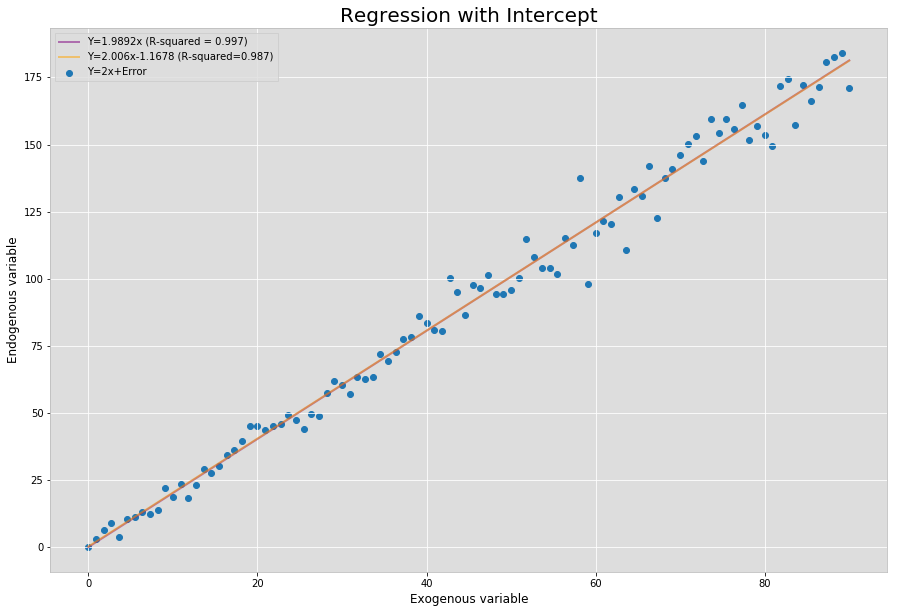

In [339]:
## Plotted on the same plot
## ** FYI / warning ** 
## I stretched the figure horizontally so you can see the miniscule differences between the regression lines
## I hope you can forgive me!
pl.figure(figsize=(15,10))
pl.scatter(x, y, label = "Y=2x+Error")
pl.xlabel('Exogenous variable')
pl.ylabel('Endogenous variable')
pl.plot(x,smfit_wrong.predict(x),'purple', alpha=0.5,label='Y=1.9892x (R-squared = 0.997)')
pl.plot(x, smfit_right.predict(x1), 'orange',alpha=0.5, label = "Y=2.006x-1.1678 (R-squared=0.987)")
pl.title('Regression with Intercept', size=20)
pl.legend()

### 5. Create a line with chosen slope and a chosen intercept >=100 ** slope and plot it with uncertainties as errorbars.

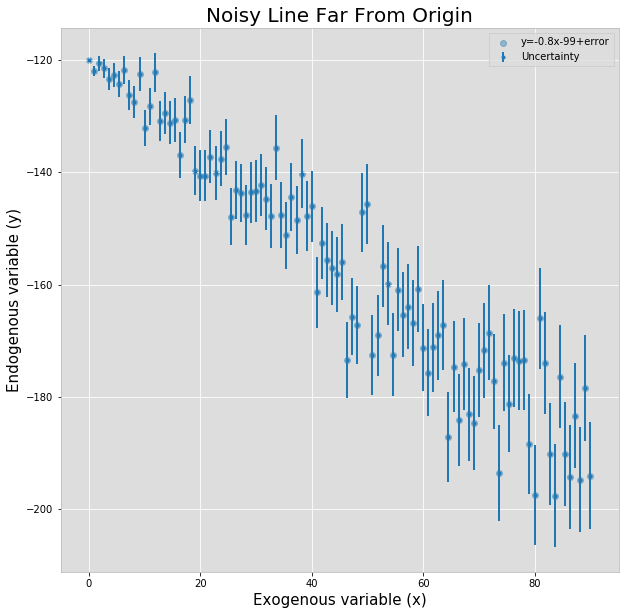

In [359]:
y2 = line(-.8, x,-120,errors=errors)

fig = pl.figure(figsize=(10,10))

pl.errorbar(x, y2, yerr=error, fmt='.', label = "Uncertainty")
pl.scatter(x, y2, alpha=0.4, label = "y=-0.8x-99+error")

pl.xlabel('Exogenous variable (x)', size=15)
pl.ylabel('Endogenous variable (y)',size=15)
pl.title('Noisy Line Far From Origin',size=20)
pl.legend()

**Figure 3** The scattered datapoints were produced by adding noise to a line with an intercept far from the origin (in relation to the slope). The original line was y=-0.8x-120 
with noise pulled from a standard normal distribution multiplied by the square root of x. The errorbar intervals are equal to twice the square root of x.

### 6. Use Statsmodels.api.OLS to fit new x and y

In [360]:
smfit2_wrong=smf.OLS(y2,x).fit()
print(bold+'Regression through origin:'.center(80)+unbold)
print(smfit2_wrong.summary())
smfit2=smf.OLS(y2,sm.add_constant(x)).fit()
print('\n'+bold+'Regression with intercept:'.center(80)+unbold)
print(smfit2.summary())

                           Regression through origin:                           
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     564.3
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           1.11e-42
Time:                        20:32:43   Log-Likelihood:                -552.80
No. Observations:                 100   AIC:                             1108.
Df Residuals:                      99   BIC:                             1110.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------

**Discussion** The R-squared for the regression line through the origin is 0.851, while the R-squared for the regression line with an intercept is 0.911. The intercept coefficient is -120.1671 +/- 1.311, which includes the real coefficient value of -120. The x coefficient is -0.7978 +/- 0.025, which includes the real x coefficient -0.8. 

### 7. Fit the data with WLS (linear fit that takes into account the uncertainties by 'down-weighing' observations with large uncertanties.

In [361]:
smfit2_wrong=smf.WLS(y2,x).fit()
print(bold+'Regression through origin:'.center(80)+unbold)
print(smfit2_wrong.summary())
smfit2=smf.WLS(y2,sm.add_constant(x)).fit()
print('\n'+bold+'Regression with intercept:'.center(80)+unbold)
print(smfit2.summary())

                           Regression through origin:                           
                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.851
Model:                            WLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     564.3
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           1.11e-42
Time:                        20:32:46   Log-Likelihood:                -552.80
No. Observations:                 100   AIC:                             1108.
Df Residuals:                      99   BIC:                             1110.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------

**Discussion** The results are exactly the same as in the OLS Regression. 